In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
TRAIN_PATH = '/content/drive/My Drive/Data_Science/mask_dataset/dataset/'

In [0]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [0]:
def get_pictures(folder):
    Images= []
    Labels = []
    label =0
    for labels in os.listdir(folder):
        if labels == 'with mask':
            label = 0
        elif labels == 'without mask':
            label =1
        for images in os.listdir(folder+labels):
            try:
                image = cv2.imread(folder+labels+r'/'+images)
                # image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (200,200))
                # image = np.expand_dims(image, axis=-1)
                Images.append(image)
                Labels.append(label)
            except:
                None
    return shuffle(Images, Labels, random_state= 12863686)

def get_labels(code):
    labels = {0:'with mask', 1:'without mask'}
    
    return labels[code]

In [0]:
Images, Labels = get_pictures(TRAIN_PATH) #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [0]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (1385, 200, 200, 3)
Shape of Labels: (1385,)


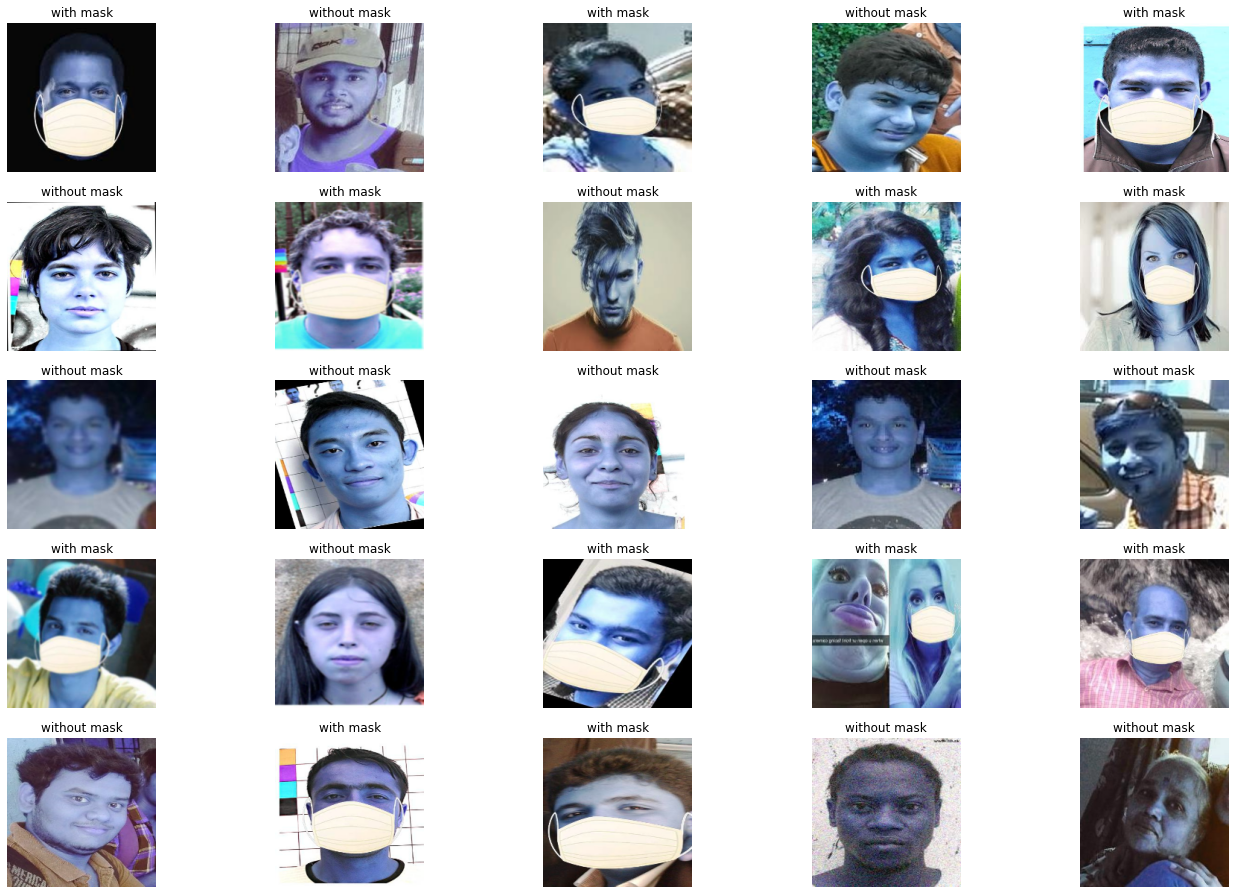

In [0]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_labels(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
data=np.load(r'/content/drive/My Drive/Data_Science/mask_dataset/data.npy')
target=np.load(r'/content/drive/My Drive/Data_Science/mask_dataset/target.npy')

In [0]:
data.shape

(1376, 100, 100, 1)

In [0]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 200)       2000      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 96, 180)       324180    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 180)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 17, 17, 180)       291780    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 140)       226940    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 100)       126100    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 50)       

In [0]:
history = trained = model.fit(data,target,epochs=20,validation_split=0.20)

Epoch 1/20
35/35 [==============================] - 5s 152ms/step - loss: 0.6950 - accuracy: 0.5109 - val_loss: 0.6880 - val_accuracy: 0.5978
Epoch 2/20
35/35 [==============================] - 4s 109ms/step - loss: 0.6533 - accuracy: 0.6264 - val_loss: 0.5444 - val_accuracy: 0.8116
Epoch 3/20
35/35 [==============================] - 4s 109ms/step - loss: 0.4535 - accuracy: 0.8309 - val_loss: 0.3064 - val_accuracy: 0.9022
Epoch 4/20
35/35 [==============================] - 4s 109ms/step - loss: 0.2213 - accuracy: 0.9200 - val_loss: 0.1070 - val_accuracy: 0.9674
Epoch 5/20
35/35 [==============================] - 4s 109ms/step - loss: 0.1110 - accuracy: 0.9655 - val_loss: 0.1588 - val_accuracy: 0.9457
Epoch 6/20
35/35 [==============================] - 4s 109ms/step - loss: 0.0920 - accuracy: 0.9736 - val_loss: 0.0802 - val_accuracy: 0.9819
Epoch 7/20
35/35 [==============================] - 4s 110ms/step - loss: 0.0933 - accuracy: 0.9718 - val_loss: 0.0786 - val_accuracy: 0.9710
Epoch 

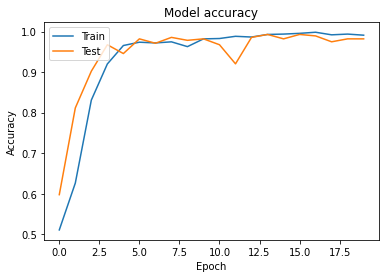

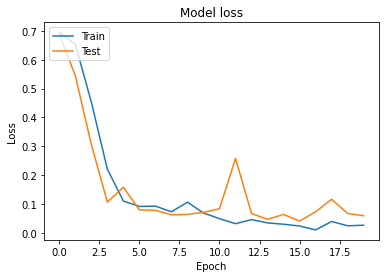

In [0]:
#Plot the graph for accuracy and loss for better understanding
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
model.save('mask_detection_model.h5') 

In [0]:
from google.colab import files

In [0]:

files.download("mask_detection_model.h5")